# Running R code in Jupyter Notebooks

### Load required libraries

In [1]:
suppressMessages(library(dplyr)); library(stringr); library(ggplot2); library(readr); suppressMessages(library(lubridate));
suppressMessages(library(ggvis))

In [2]:
setwd("D:/OneDrive - Diesel Analytics/Talks/PyData_IntermediateJupyterNotebooks/Data")

### Load data

In [3]:
trade.data <- read_csv("2014_TradeData.csv")

In [4]:
head(trade.data)

,country,trade.balance,exports,imports,Region,trade.status
1,Afghanistan,720400000,792400000,7.2e+07,South Asia,Great
2,Albania,-17700000,51300000,6.9e+07,Europe,Bad
3,Algeria,-2011900000,2.62e+09,4628900000,North Africa,Bad
4,Andorra,2600000,3800000,1200000,Europe,Great
5,Angola,-3680700000,2039100000,5719800000,Sub-Sharan Africa,Bad
6,Anguilla,57900000,63200000,5300000,na,Great


### Create graph using ggplot2

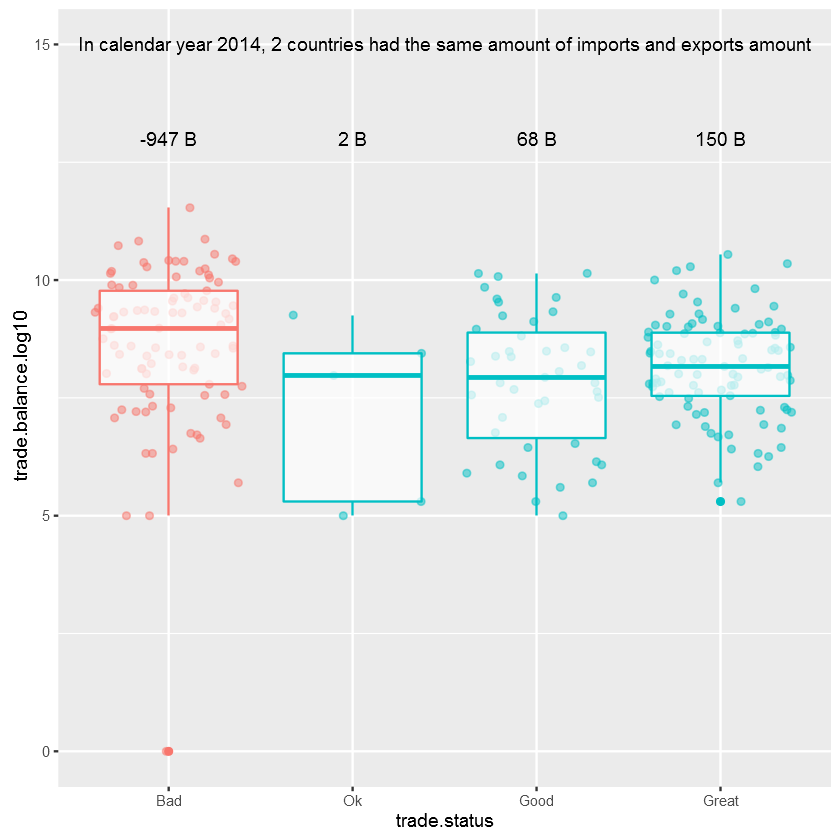

In [5]:
graph.data <- trade.data

zero.and.ok.count <- nrow(graph.data %>% filter(trade.status == "Ok",trade.balance==0))

graph.data <- 
  graph.data %>%
  select(country, trade.status, trade.balance) %>%
  mutate(trade.balance.log10 = ifelse(trade.balance == 0,0,log10(abs(trade.balance))), 
         trade.status = factor(x = trade.status, levels=c("Bad", "Ok", "Good", "Great")), 
         positive.or.negative = ifelse(trade.balance <=0,"Negative","Positive")
  ) %>%
  filter(!(trade.status == "Ok"& trade.balance==0))

bad.tb.df <- graph.data %>% filter(trade.status == "Bad") %>% summarize(bal = sum(trade.balance))
bad.tb.val <- paste(as.character(round(bad.tb.df[1]/1000000000,0)),"B",sep = " ")

ok.tb.df <- graph.data %>% filter(trade.status == "Ok") %>% summarize(bal = sum(trade.balance))
ok.tb.val <- paste(as.character(round(ok.tb.df[1]/1000000000,0)),"B",sep = " ")

good.tb.df <- graph.data %>% filter(trade.status == "Good") %>% summarize(bal = sum(trade.balance))
good.tb.val <- paste(as.character(round(good.tb.df[1]/1000000000,0)),"B",sep = " ")

great.tb.df <- graph.data %>% filter(trade.status == "Great") %>% summarize(bal = sum(trade.balance))
great.tb.val <- paste(as.character(round(great.tb.df[1]/1000000000,0)),"B",sep = " ")

chart.title = paste("In calendar year 2014, "
                    ,zero.and.ok.count
                    ," "
                    ,ifelse(zero.and.ok.count==1,"country","countries")
                    ," had the same amount of imports and exports amount"
                    ,sep="")

p <- ggplot(graph.data, aes(x=trade.status, y=trade.balance.log10,colour = positive.or.negative))
p <- p + geom_jitter(alpha=0.5,height=0) 
p <- p + geom_boxplot(alpha = 0.7) 
p <- p + theme(legend.position="none")
p <- p + annotate(geom="text", x=2.5, y=15, label=chart.title)
p <- p + annotate(geom="text", x="Bad", y=13, label=bad.tb.val)
p <- p + annotate(geom="text", x="Ok", y=13, label=ok.tb.val)
p <- p + annotate(geom="text", x="Good", y=13, label=good.tb.val)
p <- p + annotate(geom="text", x="Great", y=13, label=great.tb.val)
print(p)


### References  

Link to directions on how to install the R kernel:  https://github.com/IRkernel/IRkernel